/tmp/ipykernel_1562421/2044737335.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[omega_columns] = data[omega_columns].fillna(method="ffill", axis=1)


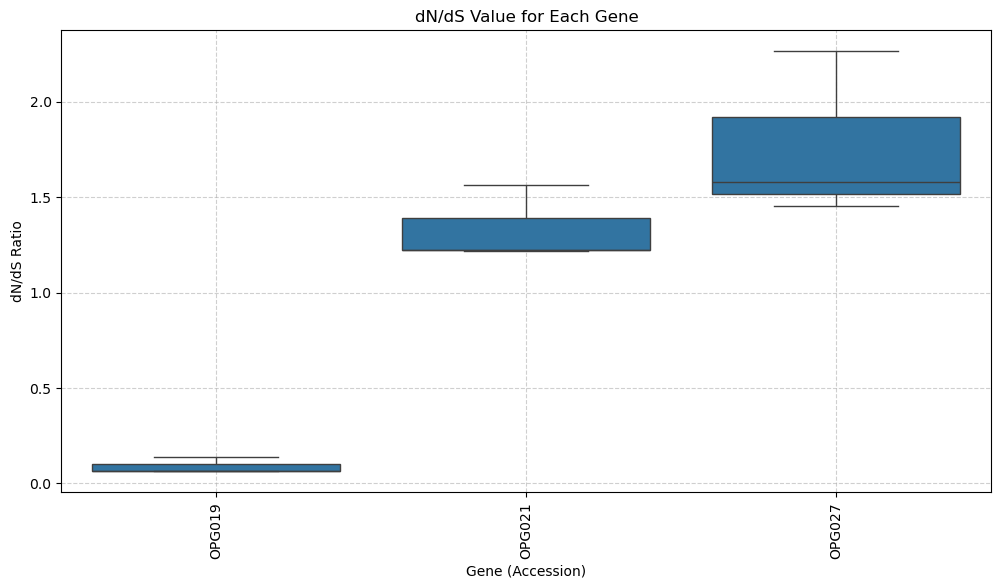

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("./data/dnds.csv").dropna()
data['Accession'] = data['Accession'].str.replace(r'^.*_', '', regex=True)
target_lis = ['OPG019', 'OPG027', 'OPG021']
data = data[data['Accession'].isin(target_lis)]

try:
    data = data
    omega_columns = [col for col in data.columns if "omega" in col]

    data[omega_columns] = data[omega_columns].fillna(method="ffill", axis=1)

    df_melted = data.melt(id_vars=["Accession"], value_vars=omega_columns, var_name="Omega Type", value_name="dN/dS")

    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Accession", y="dN/dS", data=df_melted)
    plt.xticks(rotation=90) 
    plt.title("dN/dS Value for Each Gene")
    plt.ylabel("dN/dS Ratio")
    plt.xlabel("Gene (Accession)")
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.show()

except FileNotFoundError:
    print("Data Missing!")
